In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML
import BasicTools as BT
import WaveTools as WT
import PlotTools as PT
import FFTTools as FFTT
import OperatorTools as OT
import GridTransferTools as GTT
import TestTools as TT
import SolverTools as ST

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 1000)

In [2]:
nh = 256
omega = BT.Grid(nh)
waves = WT.MakeWaves(omega)
sigma = 0.1
mu = 0.5
c = 1.
nt = 20
CFL = 0.5

Are you *sure* your labels are ordered correctly?


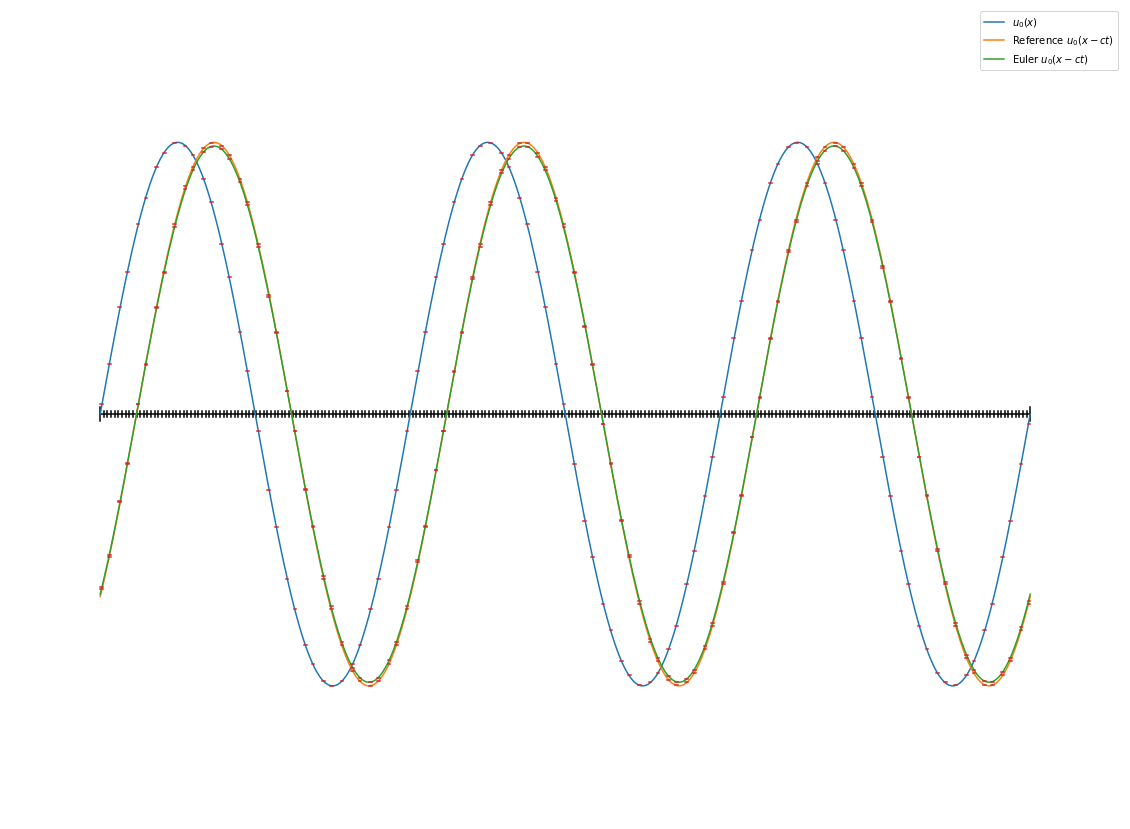

In [3]:
# gauss = TT.Gauss(omega, sigma, mu)
FCoefs = np.zeros(nh, float) # FFTT.FourierCoefs(omega, waves, gauss)
FCoefs[5] = 1
# FCoefs[::2] = 0
gauss = waves @ FCoefs
EulerCoefs, t = ST.ForwardEuler(omega, waves, gauss, nt, c, CFL)
propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
allCoefs = PT.Load(FCoefs, propFCoefs, EulerCoefs)
PT.PlotMixedWave(omega, waves, allCoefs, rescale = [4, 6], labels = [r'$u_{0} (x)$', r'Reference $u_{0} (x - c t)$', r'Euler $u_{0} (x - c t)$'])



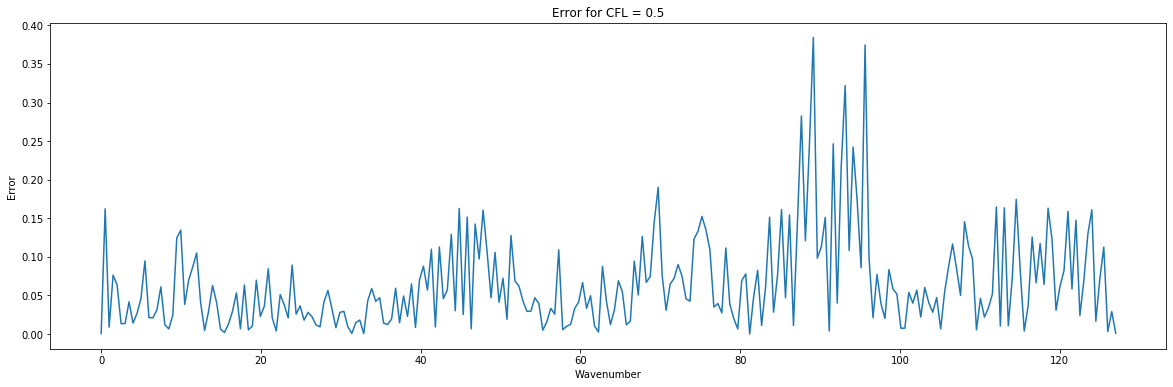

In [4]:
ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ks, error)
# plt.plot(ks, EulerCoefs)
# plt.plot(ks, propFCoefs)
plt.title('Error for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.show()

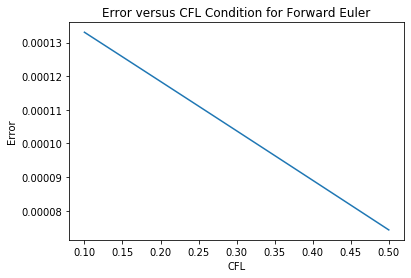

In [5]:
norms, CFLs = TT.NormVersusCFL(ST.ForwardEuler, omega, waves, gauss, c, CFL, nt, normType = 'L1', errorType = 'absolute')
plt.figure()
plt.plot(CFLs, norms)
plt.title('Error versus CFL Condition for Forward Euler')
plt.xlabel('CFL')
plt.ylabel('Error')
plt.show()


In [6]:
A = np.arange(20)
B = A[::2][1:]
C = A[1::2][:-1]
print(A)
print(B)
print(C)
print(propFCoefs)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 2  4  6  8 10 12 14 16 18]
[ 1  3  5  7  9 11 13 15 17]
[ 0.          0.          0.          0.          0.          0.74095113 -0.67155895  0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.          0.

In [7]:
ampKs, ampError = TT.AmpError(omega, EulerCoefs, propFCoefs)

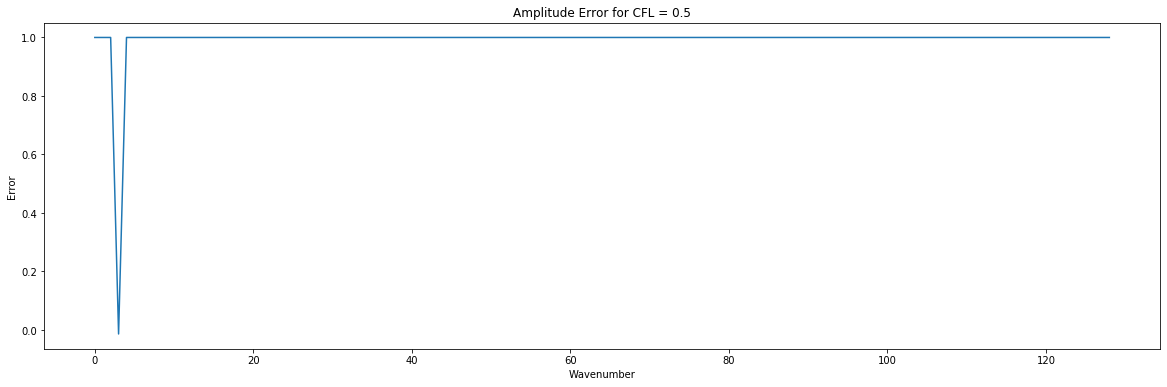

In [8]:
ks, error = TT.CalcError(omega, propFCoefs, EulerCoefs, errorType = 'relative')
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ampKs, ampError)
plt.title('Amplitude Error for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.show()

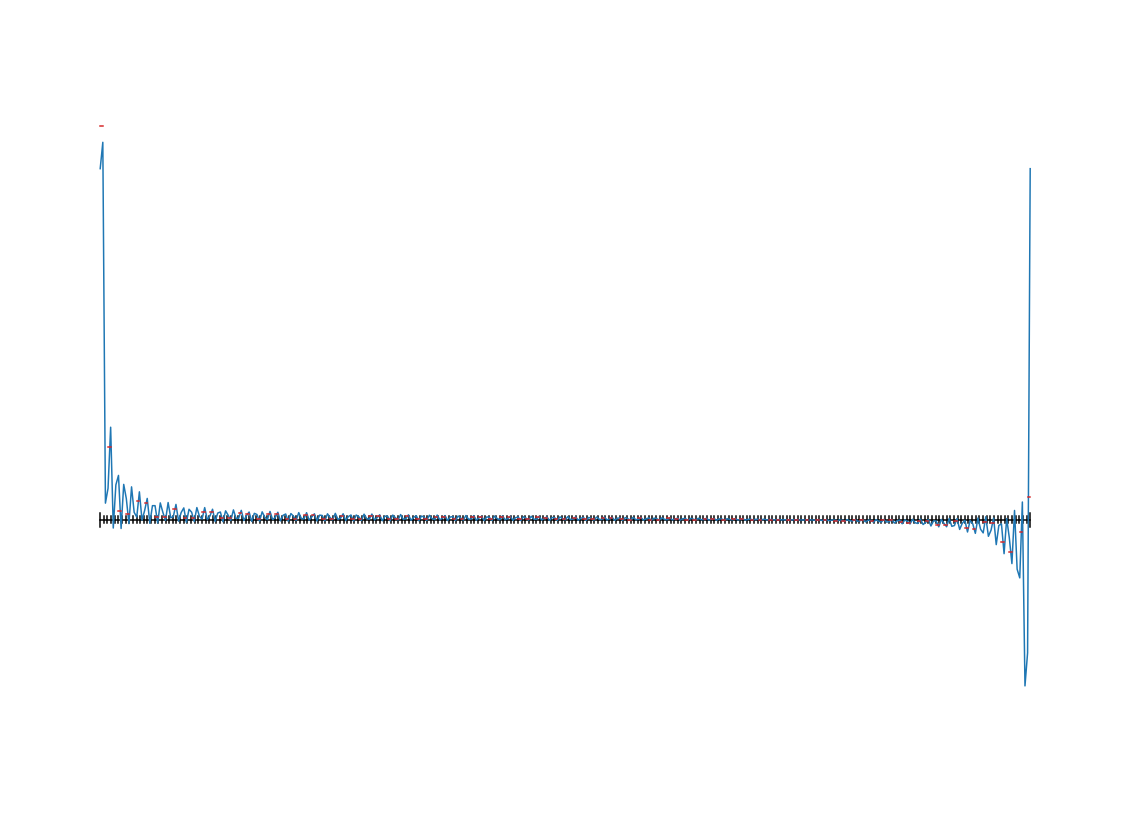

In [9]:
deltaCoefs = np.ones(nh, float)
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

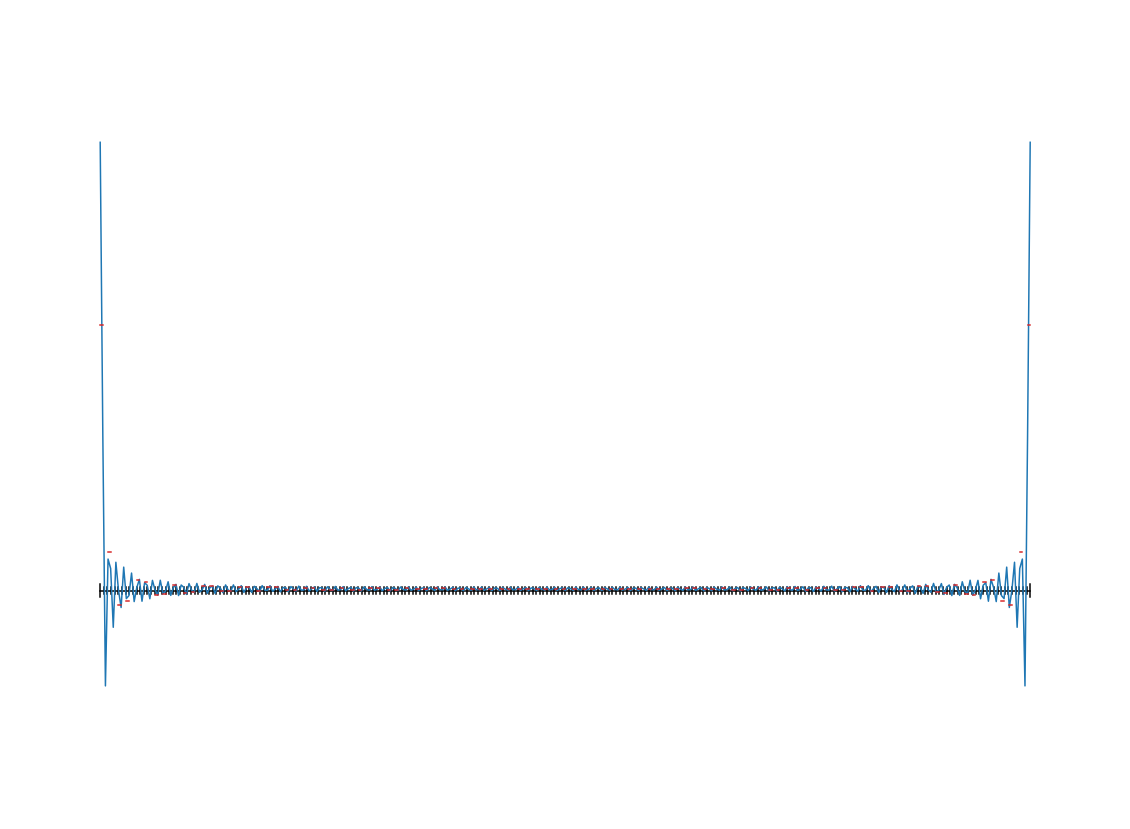

In [10]:
deltaCoefs[1::2] = 0
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

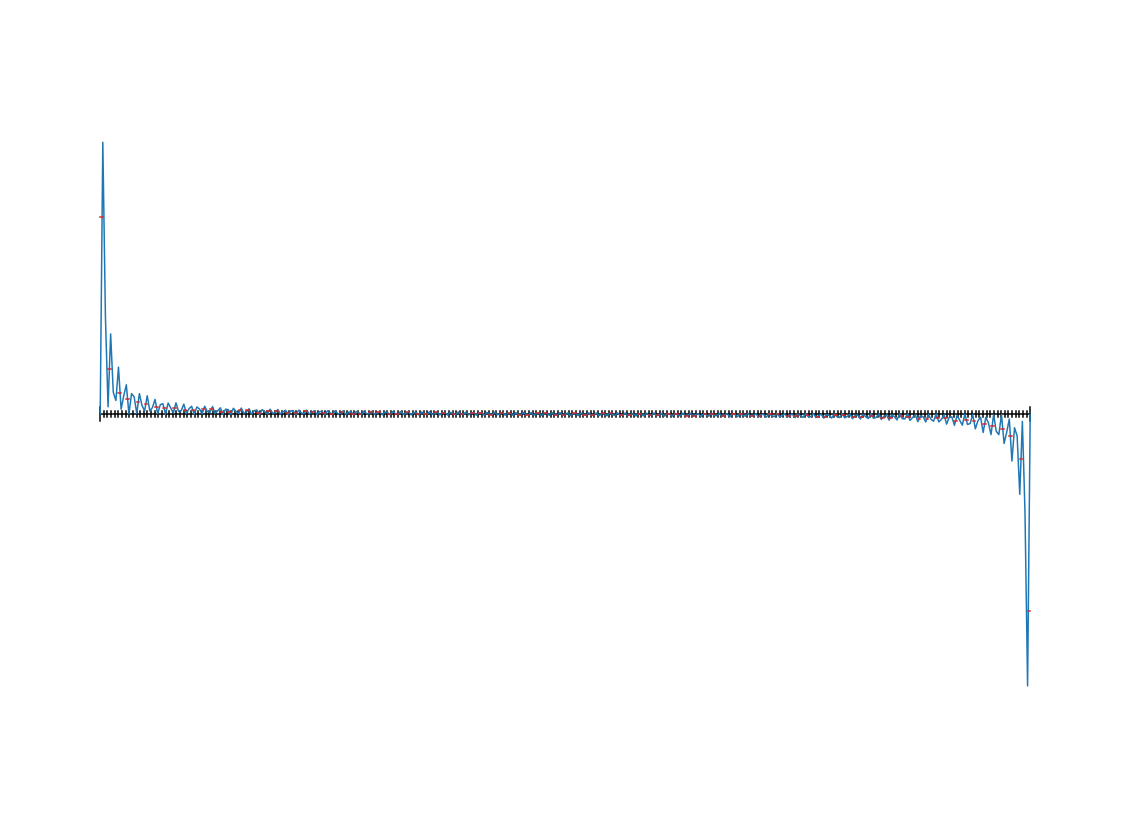

In [11]:
deltaCoefs = np.ones(nh, float)
deltaCoefs[::2] = 0
PT.PlotMixedWave(omega, waves, deltaCoefs, rescale = [4, 6])

In [12]:
def ExplicitMidpoint(omega, waves, u0, nt, const, CFL, periodic = True):
    degFreed = omega.degFreed
    x = omega.xCell
    dx = omega.dx
    dx_0 = 1 - x[::-1][0] + x[0]
    dt = CFL * dx / const
    dt_0 = CFL * dx_0 / const
    t = nt * dt[0]
    u = u0.copy()
    
    
#     for n in range(nt):
#         u_f = u[::-1][0]
#         u[1:] = u[1:] - (const * (dt / dx) * (u[1:] - u[:-1]))
#         if (periodic == True):
#             u[0] = u[0] - (const * (dt_0 / dx_0) * (u[0] - u_f))
    
    h = (b - a) / n;
halfh = h / 2;
y(1,:) = ya;
t(1) = a;
for i = 1 : n
    t(i+1) = t(i) + h;
    z = y(i,:) + halfh * f(t(i),y(i,:));
    y(i+1,:) = y(i,:) + h * f(t(i)+halfh,z);
    
    
    uCoefs = LA.inv(waves) @ u
    return uCoefs, t

SyntaxError: invalid syntax (<ipython-input-12-1f928e602e30>, line 20)

In [ ]:
def Midpoint_meth(omega, waves, u0, nt, const, CFL, periodic = True)# (def_fn, a, b, N, ya):
    
    f = def_fn #input definining function

    h = (b - a) / nt # developing step size h, from input values divided by N

    t = np.arange(a, b+h, h) #array intialized to hold mesh points t
    y = np.zeros((N+1,))      #array to hold Midpoint Method approximated y values

    y[0] = u0   #intial condition 

    #iterative method
    for  i in range(0, N):

        tau = t[i]      #current mesh point t
        w = y[i]        #current value y(t)

        k1 = f(tau,w)
        h1 = h/2.0

        # next iteration using midpoint method 
        y[i + 1] = y[i] + h * f(tau + h1, w + (h1*k1) )


        return (t, y)